<a href="https://colab.research.google.com/github/Hanifuniverse/UTS_Pengolahan-Citra/blob/main/2206094_Muhammad_Hanif_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Histogram Citra

Implementasikan perhitungan histogram dari sebuah citra
grayscale, tampilkan histogram tersebut, dan normalisasi hasilnya. Gunakan
library OpenCV dan Matplotlib untuk visualisasi.

Saving 2024_04_16_12_59_IMG_3219.JPG to 2024_04_16_12_59_IMG_3219 (5).JPG


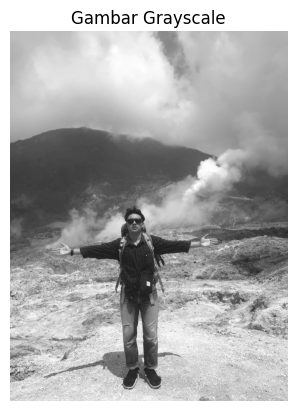

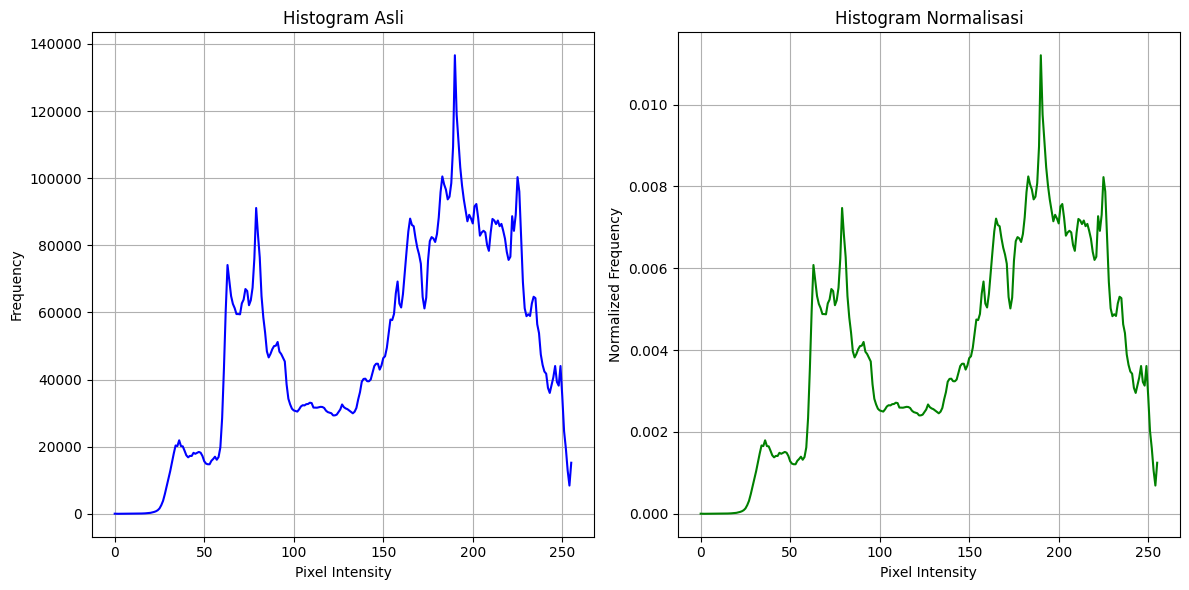

In [8]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk menghitung histogram
def calculate_histogram(image, normalized=False):
    # Hitung histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalisasi jika diperlukan
    if normalized:
        hist = hist / hist.sum()

    return hist

# Fungsi untuk menampilkan histogram
def plot_histograms(original_hist, normalized_hist):
    # Plot kedua histogram
    plt.figure(figsize=(12, 6))

    # Histogram asli
    plt.subplot(1, 2, 1)
    plt.plot(original_hist, color='blue')
    plt.title("Histogram Asli")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()

    # Histogram normalisasi
    plt.subplot(1, 2, 2)
    plt.plot(normalized_hist, color='green')
    plt.title("Histogram Normalisasi")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Normalized Frequency")
    plt.grid()

    # Tampilkan plot
    plt.tight_layout()
    plt.show()

# Upload file gambar
uploaded = files.upload()

# Proses setiap file yang diunggah
for file_name in uploaded.keys():
    # Membaca gambar
    image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Tampilkan gambar asli
        plt.imshow(image, cmap='gray')
        plt.title("Gambar Grayscale")
        plt.axis("off")
        plt.show()

        # Hitung histogram asli dan normalisasi
        original_hist = calculate_histogram(image, normalized=False)
        normalized_hist = calculate_histogram(image, normalized=True)

        # Plot histogram asli dan normalisasi
        plot_histograms(original_hist, normalized_hist)
    else:
        print(f"Error: Tidak dapat membaca gambar dari {file_name}. Pastikan formatnya benar.")


Gambar memiliki karakteristik yang cenderung terang dengan dominasi piksel intensitas tinggi (150–250), terutama sekitar 200–220. Area gelap dalam gambar relatif sedikit. Histogram normalisasi menunjukkan pola serupa dalam bentuk proporsi, memungkinkan analisis yang lebih standar. Secara keseluruhan, gambar memiliki rentang intensitas yang luas, dengan kontras yang cukup baik meskipun area gelap terbatas.
Langkah-langkahnya :
Unggah gambar melalui widget Colab.
1. Baca gambar dalam mode grayscale.
2. Tampilkan gambar grayscale.
3. Menghitung histogram asli dan normalisasi (distribusi piksel).
4. Menampilkan histogram asli dan normalisasi berdampingan.

# 2. Operasi Konvolusi dengan Kernel Sederhana





 Implementasikan operasi
konvolusi pada gambar menggunakan kernel rata-rata 3x3. Bandingkan hasilnya
dengan gambar asli. Berikan penjelasan mengenai efek yang terjadi setelah
konvolusi

Saving 2024_04_16_12_59_IMG_3219.JPG to 2024_04_16_12_59_IMG_3219 (6).JPG


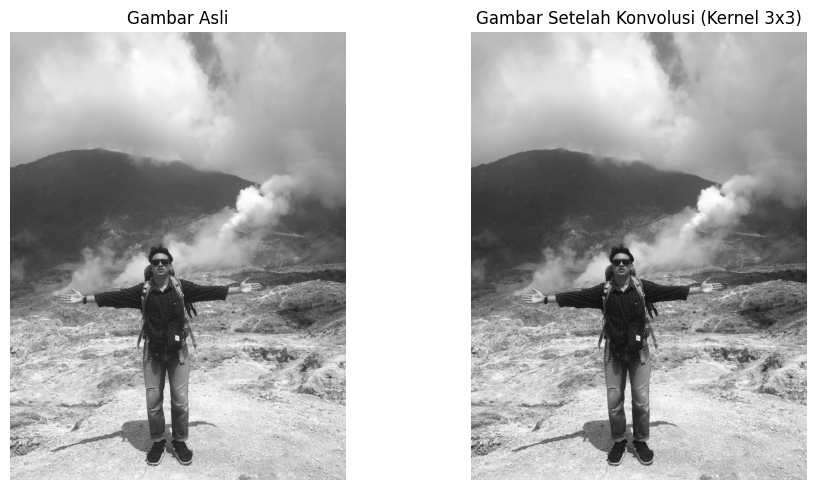

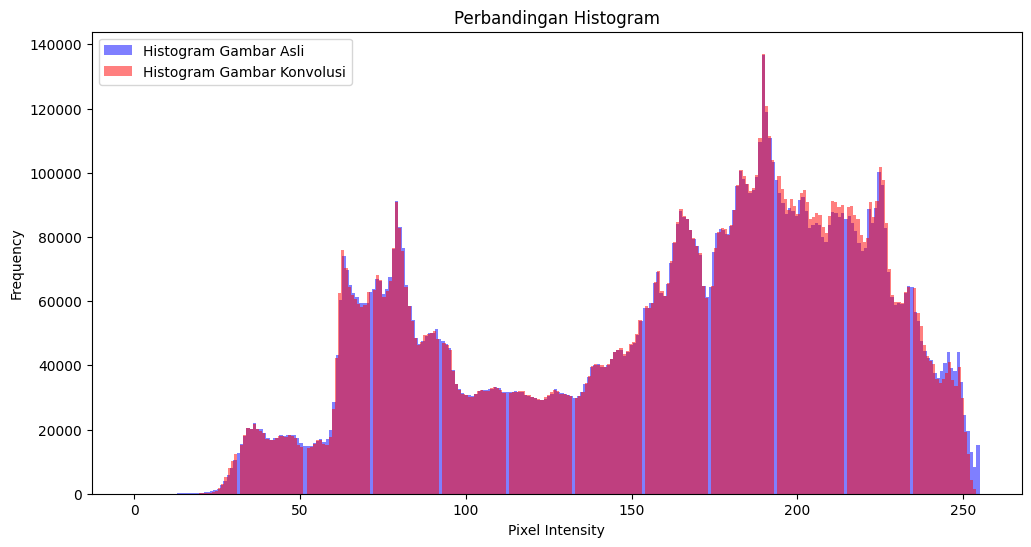

In [9]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload file gambar
uploaded = files.upload()

# Proses setiap gambar yang diunggah
for file_name in uploaded.keys():
    # Membaca gambar
    image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Menampilkan gambar asli
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Gambar Asli")
        plt.axis("off")

        # Membuat kernel rata-rata 3x3
        kernel = np.ones((3, 3), np.float32) / 9

        # Melakukan operasi konvolusi menggunakan filter2D
        convolved_image = cv2.filter2D(image, -1, kernel)

        # Menampilkan hasil konvolusi
        plt.subplot(1, 2, 2)
        plt.imshow(convolved_image, cmap='gray')
        plt.title("Gambar Setelah Konvolusi (Kernel 3x3)")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

        # Menampilkan efek dengan membandingkan histogram
        plt.figure(figsize=(12, 6))
        plt.hist(image.ravel(), bins=256, color='blue', alpha=0.5, label='Histogram Gambar Asli')
        plt.hist(convolved_image.ravel(), bins=256, color='red', alpha=0.5, label='Histogram Gambar Konvolusi')
        plt.title("Perbandingan Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()
    else:
        print(f"Error: Tidak dapat membaca gambar dari {file_name}. Pastikan formatnya benar.")


Konvolusi ngan kernel rata 3x3 menghasilkan efek moothing pada gambar, dimana membuat gambar tampak lebih halus dengan detail yang berkurang, Ini berguna untuk menghilangkan noise, menghilangkan efek blur dan membuat gambar lebih halus, tapi dapat menghilangkan detail kecil pada gambar

Langkah-langkahnya :
1. Piih gambar dari folder
2. Pilih kernerl, dan disini saya menginput 3x3 sesuai dengan perintahnya
3. Geser kernel ke seluruh gambar
4. Hasilkan gambar baru
5. Menampilkan hasil

# 3 . Transformasi Fourier

Lakukan Transformasi Fourier pada sebuah citra
grayscale. Tampilkan magnitude spectrum hasil transformasi serta gambar hasil
invers transformasi. Sertakan penjelasan mengenai informasi apa yang dapat
diperoleh dari magnitude spectrum.

Saving 2024_04_16_12_59_IMG_3219.JPG to 2024_04_16_12_59_IMG_3219 (7).JPG


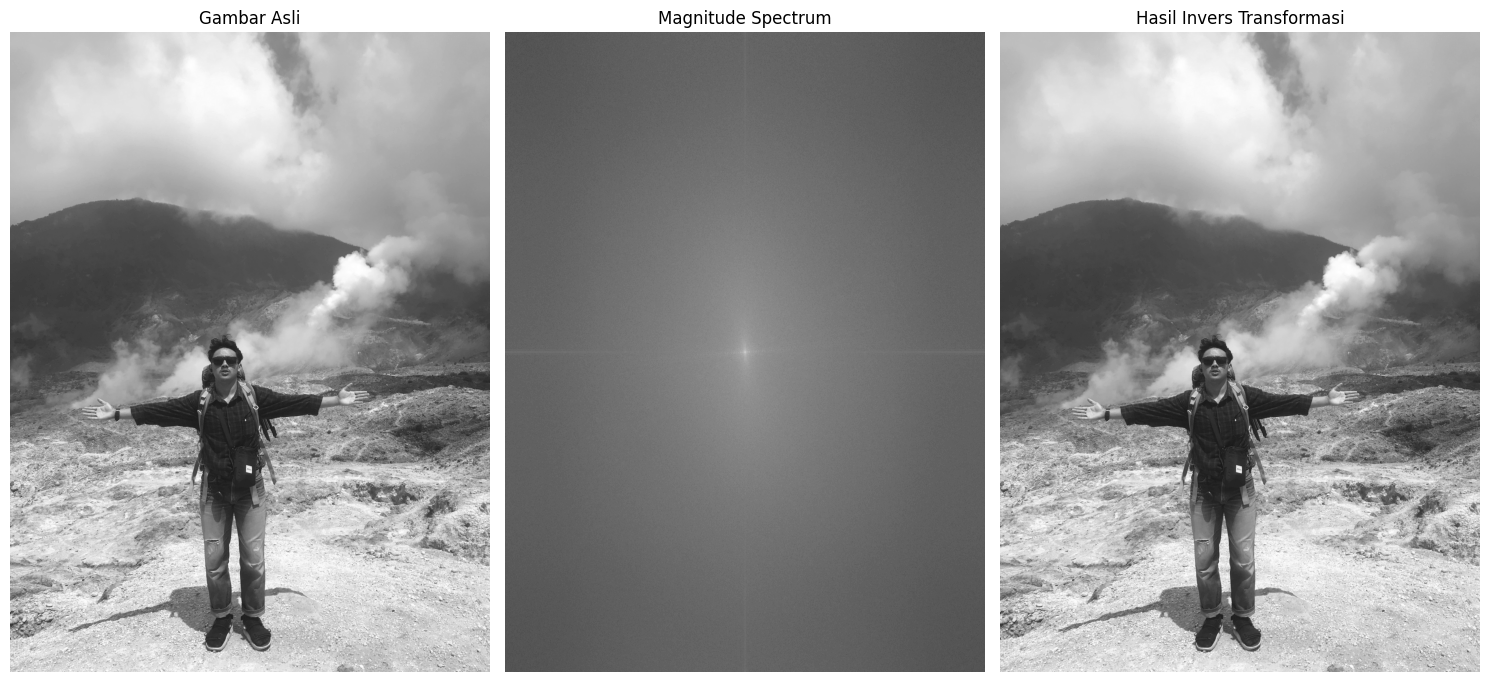

In [10]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload file gambar
uploaded = files.upload()

# Proses setiap gambar yang diunggah
for file_name in uploaded.keys():
    # Membaca gambar grayscale
    image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Transformasi Fourier
        dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
        dft_shift = np.fft.fftshift(dft)  # Geser frekuensi nol ke tengah
        magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

        # Inverse Transformasi Fourier
        dft_shift_back = np.fft.ifftshift(dft_shift)  # Geser kembali ke posisi semula
        inverse_image = cv2.idft(dft_shift_back)  # Invers DFT
        inverse_image = cv2.magnitude(inverse_image[:, :, 0], inverse_image[:, :, 1])

        # Menampilkan hasil
        plt.figure(figsize=(15, 10))

        # Gambar asli
        plt.subplot(1, 3, 1)
        plt.imshow(image, cmap='gray')
        plt.title("Gambar Asli")
        plt.axis("off")

        # Magnitude Spectrum
        plt.subplot(1, 3, 2)
        plt.imshow(magnitude_spectrum, cmap='gray')
        plt.title("Magnitude Spectrum")
        plt.axis("off")

        # Gambar hasil invers
        plt.subplot(1, 3, 3)
        plt.imshow(inverse_image, cmap='gray')
        plt.title("Hasil Invers Transformasi")
        plt.axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print(f"Error: Tidak dapat membaca gambar dari {file_name}. Pastikan formatnya benar.")


Jadi frekuensi rendah yang dominan artinya gambar punya pola besar yang halus, tanpa banyak perubahan mendadak. Sementara frekuensi tinggi yang lebih sedikit menunjukkan detail kecil atau bagian tajam pada gambar tidak terlalu banyak. Transformasi Fourier ini membantu kita melihat gambar dari sisi frekuensi, jadi bisa dipakai buat ngatur gambar, ngilangin noise, atau bikin detailnya lebih jelas.
Langkah-langkahnya:
1. Baca gambar grayscale.
2. Lakukan transformasi Fourier (DFT).
3. Geser frekuensi agar lebih mudah dianalisis.
4. Hitung magnitude spectrum untuk melihat distribusi frekuensi.
5. Tampilkan magnitude spectrum.
6. Lakukan inverse transformasi Fourier untuk mengembalikan gambar.
7. Tampilkan gambar hasil inverse.

# 4. Operasi Aritmatika Citra - Pencerahan

Implementasikan fungsi pencerahan
citra dengan menambahkan konstanta pada setiap piksel. Pastikan hasilnya tidak
melewati nilai maksimum dengan menggunakan operasi clipping. Jelaskan
perubahan yang terjadi pada citra setelah pencerahan.

Saving 2024_04_16_12_59_IMG_3219.JPG to 2024_04_16_12_59_IMG_3219 (12).JPG


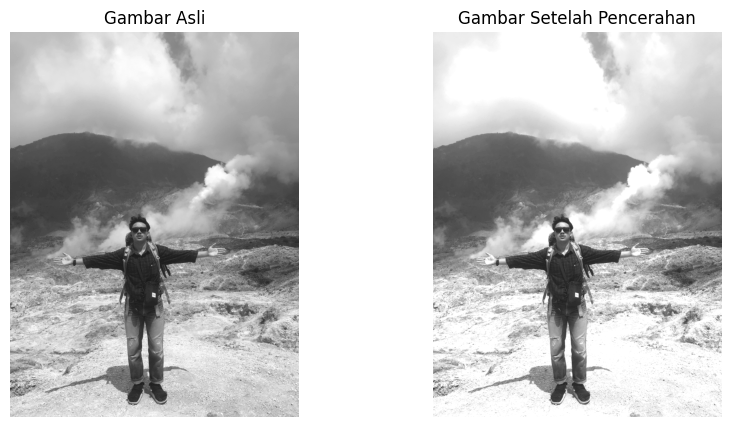

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk pencerahan citra
def brighten_image(image, brightness_value):
    # Menambahkan konstanta brightness_value pada setiap piksel
    brightened_image = cv2.add(image, brightness_value)  # Operasi penambahan dengan clipping otomatis
    return brightened_image

# Upload gambar menggunakan Google Colab
uploaded = files.upload()

# Membaca gambar yang diupload
image_path = next(iter(uploaded))  # Mendapatkan nama file gambar yang diupload
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Tentukan nilai konstanta untuk pencerahan
brightness_value = 50  # Nilai konstanta untuk mencerahkan gambar

# Terapkan fungsi pencerahan citra
brightened_image = brighten_image(image, brightness_value)

# Tampilkan gambar asli dan gambar setelah pencerahan
plt.figure(figsize=(10, 5))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Gambar Setelah Pencerahan
plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title("Gambar Setelah Pencerahan")
plt.axis('off')

plt.show()


Operasi pencerahan ini bikin gambar jadi lebih terang dari awalnya dengan nambahin nilai ke setiap piksel. Clipping digunakan supaya nilai piksel tidak lebih dari 255, jadi gambar tetap sesuai dengan batasan yang ada dan tidak jadi rusak karena nilai yang terlalu tinggi.
Langkah-langkahnya:
1. Mengupload gambar dari file manager
2. Membaca gambar Dallam format grayscale
3. Pencerahan gambar, disini saya mengaturnya 50 ke semua pixel
4. Clipping, agar pencerahannya tidak melewati batasan, dan batasannya 0 hingga 255, nilai yang lebih akan dipotong menjadi 255, agar gambar tidak terlalu terang dan rusak
5. Tampilkan hasil